In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import time

BASE_URL = "http://m-selig.ae.illinois.edu/ads/coord_database.html"
COORD_BASE_URL = "http://m-selig.ae.illinois.edu/ads/"

def get_airfoil_links():
    """Fetches the list of airfoil data links from the UIUC Airfoil Data Site."""
    response = requests.get(BASE_URL)
    soup = BeautifulSoup(response.content, 'html.parser')

    links = []
    for link in soup.find_all('a'):
        href = link.get('href')
        if href and '.dat' in href:
            links.append(COORD_BASE_URL + href)

    return links

def download_airfoil_data(links, output_dir="airfoil_data"):
    """Downloads airfoil data given a list of links."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for link in links:
        response = requests.get(link)
        filename = os.path.join(output_dir, link.split("/")[-1])

        with open(filename, 'w') as f:
            f.write(response.text)

        print(f"Downloaded {filename}")
          # Be respectful by not hitting the server too fast

def main():
    airfoil_links = get_airfoil_links()
    download_airfoil_data(airfoil_links)

if __name__ == "__main__":
    main()


Downloaded airfoil_data/bacnlf.dat
Downloaded airfoil_data/bw050209.dat
Downloaded airfoil_data/du84132v.dat
Downloaded airfoil_data/hor04.dat
Downloaded airfoil_data/hor07.dat
Downloaded airfoil_data/hor12.dat
Downloaded airfoil_data/hor20.dat
Downloaded airfoil_data/hq17.dat
Downloaded airfoil_data/hs1404.dat
Downloaded airfoil_data/hs1430.dat
Downloaded airfoil_data/hs1606.dat
Downloaded airfoil_data/hs1620.dat
Downloaded airfoil_data/hs1708.dat
Downloaded airfoil_data/hs1712.dat
Downloaded airfoil_data/jx-gs-04.dat
Downloaded airfoil_data/jx-gs-06.dat
Downloaded airfoil_data/jx-gs-10.dat
Downloaded airfoil_data/jx-gs-15.dat
Downloaded airfoil_data/kc135winglet.dat
Downloaded airfoil_data/l1003.dat
Downloaded airfoil_data/la5055.dat
Downloaded airfoil_data/lrn1015.dat
Downloaded airfoil_data/s102b.dat
Downloaded airfoil_data/s102s.dat
Downloaded airfoil_data/s4094.dat
Downloaded airfoil_data/s4095.dat
Downloaded airfoil_data/s4096.dat
Downloaded airfoil_data/s8064.dat
Downloaded air

In [ ]:
!rm "/content/drive"



rm: cannot remove '/content/drive': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/MyAerofoilData


2032c.dat	      goe101.dat		ma409.dat
a18.dat		      goe10k.dat		ma409sm.dat
a18sm.dat	      goe113.dat		marsden.dat
a63a108c.dat	      goe114.dat		marske1.dat
ag03.dat	      goe115.dat		marske2.dat
ag04.dat	      goe116.dat		marske3.dat
ag08.dat	      goe117.dat		marske4.dat
ag09.dat	      goe118.dat		marske5.dat
ag10.dat	      goe11k.dat		marske7.dat
ag11.dat	      goe121.dat		mb253515sm.dat
ag12.dat	      goe122.dat		mh102.dat
ag13.dat	      goe123.dat		mh104.dat
ag14.dat	      goe124.dat		mh106.dat
ag16.dat	      goe12k.dat		mh108.dat
ag17.dat	      goe133.dat		mh110.dat
ag18.dat	      goe134.dat		mh112.dat
ag19.dat	      goe137.dat		mh113.dat
ag23.dat	      goe13k.dat		mh114.dat
ag24.dat	      goe140.dat		mh115.dat
ag25.dat	      goe142.dat		mh116.dat
ag26.dat	      goe143.dat		mh117.dat
ag27.dat	      goe144.dat		mh120.dat
ag35.dat	      goe147.dat		mh121.dat
ag36.dat	      goe14.dat			mh122.dat
ag37.dat	      goe14k.dat		mh126.dat
ag38.dat	      goe155.dat		mh150.dat
ag44ct02r.d

In [ ]:
import os
import matplotlib.pyplot as plt

def dat_to_image(data_directory, output_directory, image_size=(128, 128)):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for coord_file_name in os.listdir(data_directory):
        if coord_file_name.endswith('.dat'):
            coord_file_path = os.path.join(data_directory, coord_file_name)

            # Load coordinates
            with open(coord_file_path, 'r') as f:
                lines = f.readlines()
                x = []
                y = []
                for line in lines:
                    parts = line.strip().split()

                    # Check if the line has at least two parts and try to convert them to floats
                    try:
                        x_val = float(parts[0])
                        y_val = float(parts[1])
                        x.append(x_val)
                        y.append(y_val)
                    except:
                        # This line might be a header or invalid data
                        continue

            # Plot and save
            plt.figure(figsize=(image_size[0]/80, image_size[1]/80), dpi=80)
            plt.fill(x, y, 'k')
            plt.xlim(-0.1, 1.1)
            plt.ylim(-0.4, 0.4)
            plt.axis('off')
            image_name = coord_file_name.replace('.dat', '.png')
            plt.savefig(os.path.join(output_directory, image_name))
            plt.close()

# Call the function
data_directory = '/content/drive/My Drive/MyAerofoilData'
output_directory = '/content/drive/My Drive/AerofoilImages'
dat_to_image(data_directory, output_directory)


In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt

def normalize_image(image_path):
    # Load the image with pixel values in [0, 1]
    img = plt.imread(image_path)

    # Normalize pixel values to [-1, 1]
    normalized_img = (img * 2) - 1

    return normalized_img

# Example Usage
output_directory = '/content/drive/My Drive/AerofoilImages'
image_path = os.path.join(output_directory, "a18.png")

normalized_image = normalize_image(image_path)

# Check the min and max values of the normalized image
print(f"Min pixel value: {np.min(normalized_image)}")
print(f"Max pixel value: {np.max(normalized_image)}")


Min pixel value: -1.0
Max pixel value: 1.0


In [ ]:
import os
import numpy as np
from PIL import Image

def normalize_image_values(image_path, save_path):
    # Load the image
    img = Image.open(image_path)
    img_data = np.asarray(img) / 255.0  # Convert pixel values to [0,1]

    # Normalize pixel values to [-1, 1]
    normalized_img_data = (img_data * 2) - 1

    # Convert normalized values back to [0,255] for saving
    saved_img_data = ((normalized_img_data + 1) / 2 * 255).astype(np.uint8)

    # Save the normalized image
    Image.fromarray(saved_img_data).save(save_path)

def normalize_all_images(dataset_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for img_file in os.listdir(dataset_directory):
        if img_file.endswith('.png'):
            img_path = os.path.join(dataset_directory, img_file)
            save_path = os.path.join(output_directory, img_file)
            normalize_image_values(img_path, save_path)

# Paths
dataset_directory = '/content/drive/My Drive/AerofoilImages'
normalized_output_directory = '/content/drive/My Drive/NormalizedAerofoilImages'

# Normalize all images in the dataset
normalize_all_images(dataset_directory, normalized_output_directory)


In [ ]:
import os
import shutil
import random

def split_dataset(dataset_directory, train_directory, val_directory, split_ratio=0.8):
    # Ensure output directories exist
    if not os.path.exists(train_directory):
        os.makedirs(train_directory)
    if not os.path.exists(val_directory):
        os.makedirs(val_directory)

    # List all image files
    all_files = [f for f in os.listdir(dataset_directory) if f.endswith('.png')]
    random.shuffle(all_files)  # Shuffle the list for randomness

    # Calculate split index
    split_idx = int(len(all_files) * split_ratio)

    # Split files
    train_files = all_files[:split_idx]
    val_files = all_files[split_idx:]

    # Move files to their respective directories
    for f in train_files:
        shutil.move(os.path.join(dataset_directory, f), os.path.join(train_directory, f))
    for f in val_files:
        shutil.move(os.path.join(dataset_directory, f), os.path.join(val_directory, f))

# Paths
dataset_directory = '/content/drive/My Drive/NormalizedAerofoilImages'
train_directory = '/content/drive/My Drive/TrainAerofoilImages'
val_directory = '/content/drive/My Drive/ValAerofoilImages'

# Split the dataset
split_dataset(dataset_directory, train_directory, val_directory)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def build_generator(z_dim=100, channels=1):
    """
    z_dim: Dimension of the random noise input to the generator.
    channels: Number of output channels (1 for grayscale images).
    """

    model = tf.keras.Sequential()

    # Fully connected layer that reshapes input into 8x8x256 tensor
    model.add(layers.Dense(8*8*256, input_dim=z_dim))
    model.add(layers.Reshape((8, 8, 256)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Upsample to 16x16
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Upsample to 32x32
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Upsample to 64x64
    model.add(layers.Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Upsample to 128x128
    model.add(layers.Conv2DTranspose(16, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Output layer to produce 128x128 image with values in [-1, 1]
    model.add(layers.Conv2D(channels, kernel_size=3, padding='same', activation='tanh'))

    return model

# Example Usage
generator = build_generator()
generator.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16384)             1654784   
                                                                 
 reshape (Reshape)           (None, 8, 8, 256)         0         
                                                                 
 batch_normalization (Batch  (None, 8, 8, 256)         1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 128)       524416    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 128)       5

In [ ]:
def build_discriminator(img_shape):
    """
    img_shape: Shape of the input image (e.g., (128, 128, 1) for a grayscale image of size 128x128).
    """

    model = tf.keras.Sequential()

    # Input layer
    model.add(layers.InputLayer(input_shape=img_shape))

    # Downsample to 64x64
    model.add(layers.Conv2D(32, kernel_size=4, strides=2, padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))

    # Downsample to 32x32
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Downsample to 16x16
    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Downsample to 8x8
    model.add(layers.Conv2D(256, kernel_size=4, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    # Final layer
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability

    return model

# Example Usage
img_shape = (128, 128, 1)  # Assuming grayscale images of size 128x128
discriminator = build_discriminator(img_shape)
discriminator.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        544       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       131200    
                                                      

In [ ]:
loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=False)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)


In [ ]:
discriminator.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


In [ ]:
# Define two separate optimizers
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

discriminator.compile(optimizer=discriminator_optimizer, loss=loss_function, metrics=['accuracy'])

# Do NOT compile the generator here; it will be trained through the GAN model


In [ ]:
import tensorflow as tf
import os
import glob

def parse_image(filename):
    # Load the PNG image file
    img = tf.io.read_file(filename)
    img = tf.io.decode_png(img, channels=1)  # Assuming grayscale images
    # Normalize the pixel values to [-1, 1]
    img = tf.cast(img, tf.float32) / 127.5 - 1.0
    return img

# Set the directory where the PNG images are stored
image_dir = '/content/drive/My Drive/TrainAerofoilImages'

# Grab all the PNG file paths
file_paths = glob.glob(os.path.join(image_dir, '*.png'))

# Create a TensorFlow dataset of file paths, then map the parse function to each file path
dataset = tf.data.Dataset.from_tensor_slices(file_paths)
dataset = dataset.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
dataset = dataset.shuffle(buffer_size=1024).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)


Epoch 1/100


discriminator_loss: 0.3886 | generator_loss: 1.7180


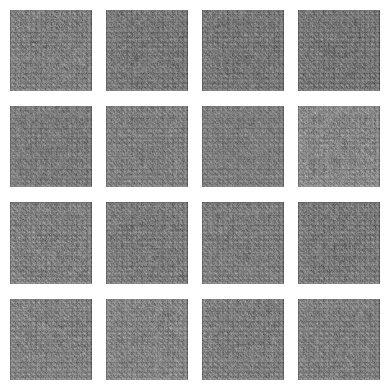

Epoch 2/100
discriminator_loss: 0.3479 | generator_loss: 1.8595


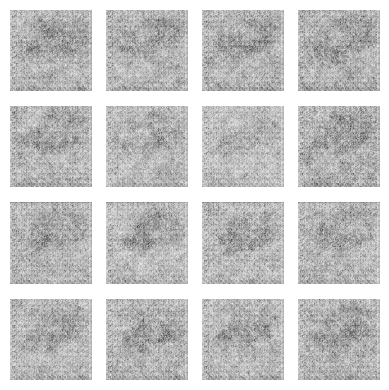

Epoch 3/100
discriminator_loss: 0.3371 | generator_loss: 1.9885


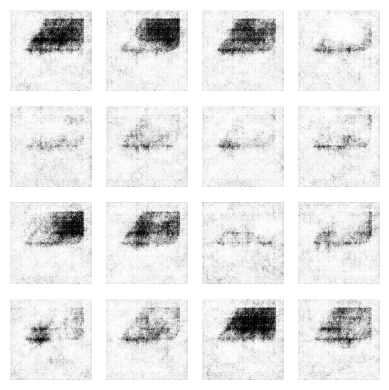

Epoch 4/100
discriminator_loss: 0.3428 | generator_loss: 2.3113


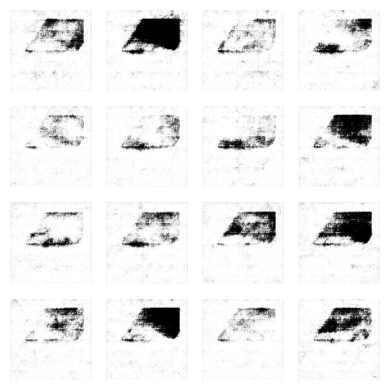

Epoch 5/100
discriminator_loss: 0.4456 | generator_loss: 5.6411


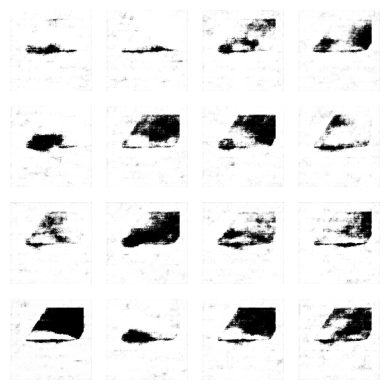

Epoch 6/100
discriminator_loss: 0.4440 | generator_loss: 3.2711


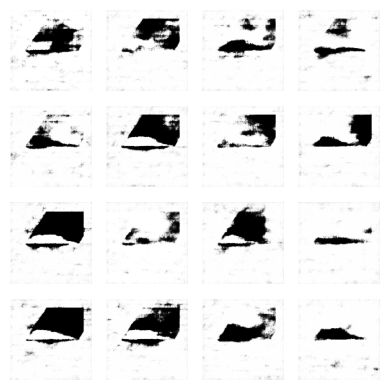

Epoch 7/100
discriminator_loss: 0.4001 | generator_loss: 2.0549


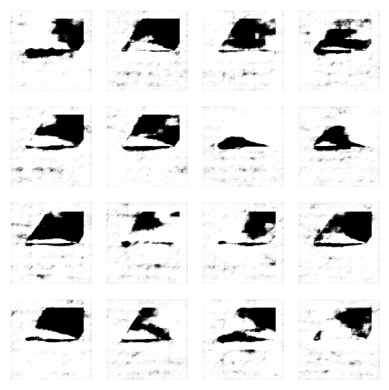

Epoch 8/100
discriminator_loss: 0.3752 | generator_loss: 2.8618


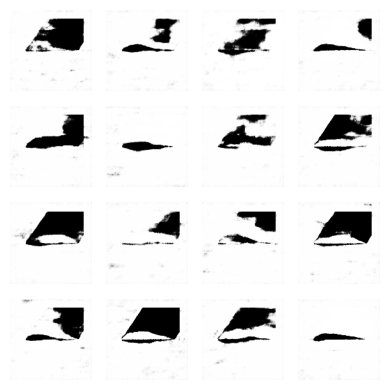

Epoch 9/100
discriminator_loss: 0.3543 | generator_loss: 2.8188


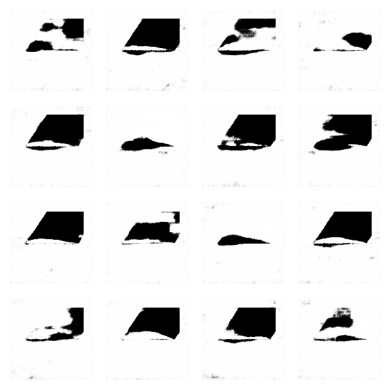

Epoch 10/100
discriminator_loss: 0.3426 | generator_loss: 1.4206


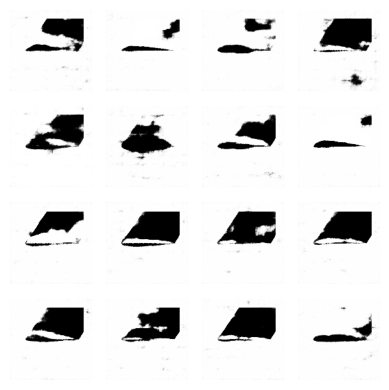

Epoch 11/100
discriminator_loss: 0.3616 | generator_loss: 3.2274


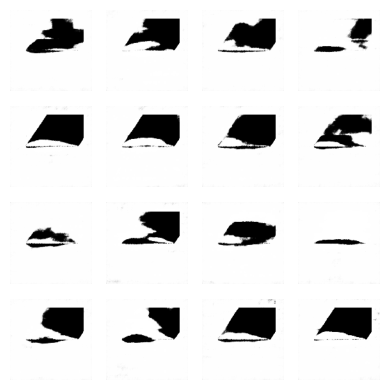

Epoch 12/100
discriminator_loss: 0.3404 | generator_loss: 1.7890


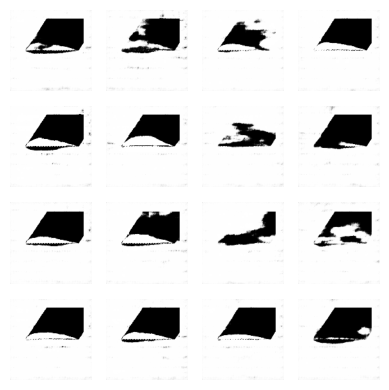

Epoch 13/100
discriminator_loss: 0.6095 | generator_loss: 2.9844


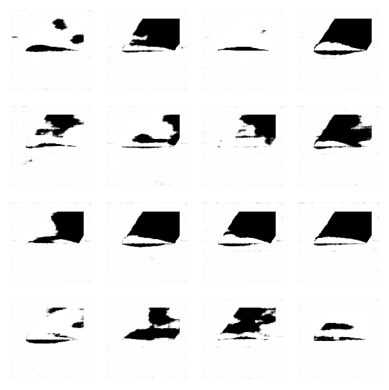

Epoch 14/100
discriminator_loss: 0.3771 | generator_loss: 1.5237


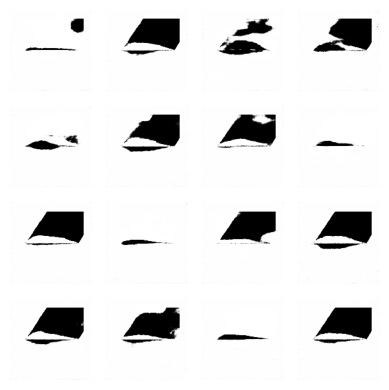

Epoch 15/100
discriminator_loss: 0.3370 | generator_loss: 2.0625


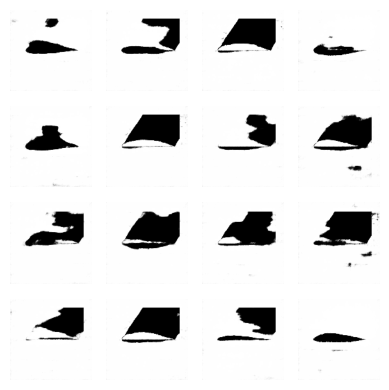

Epoch 16/100
discriminator_loss: 0.3460 | generator_loss: 2.1623


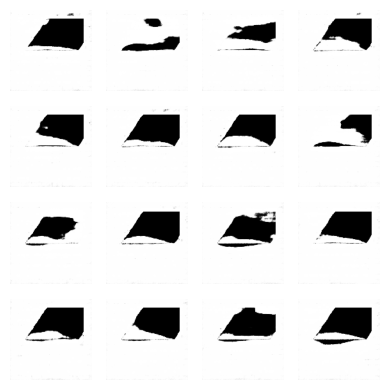

Epoch 17/100
discriminator_loss: 0.4573 | generator_loss: 1.7113


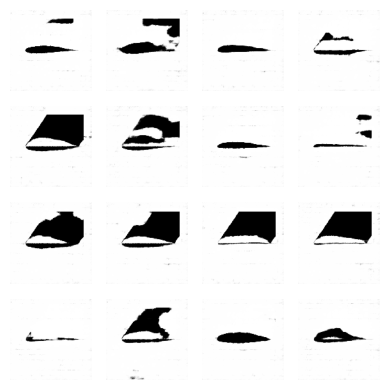

Epoch 18/100
discriminator_loss: 0.3601 | generator_loss: 1.3565


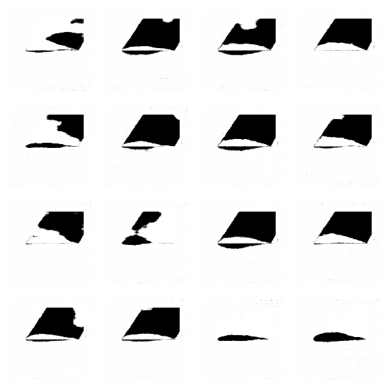

Epoch 19/100
discriminator_loss: 0.3577 | generator_loss: 2.3697


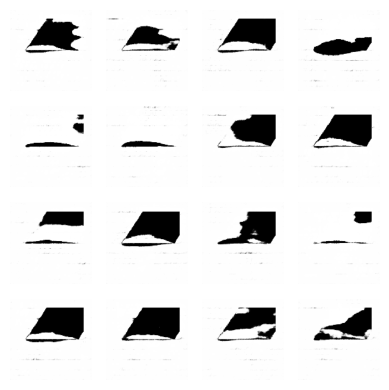

Epoch 20/100
discriminator_loss: 0.3460 | generator_loss: 1.7911


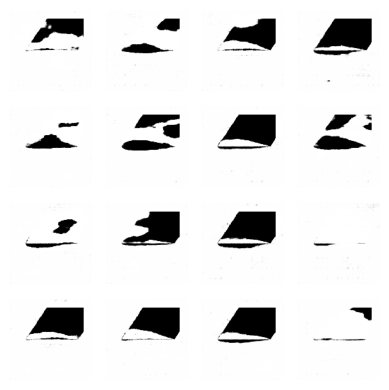

Epoch 21/100
discriminator_loss: 0.3580 | generator_loss: 2.3854


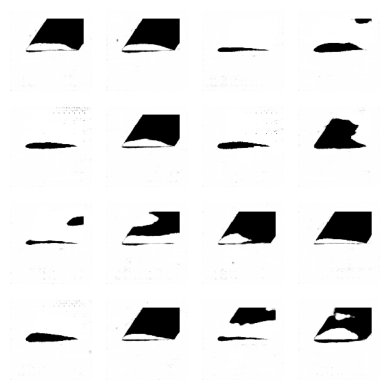

Epoch 22/100
discriminator_loss: 0.3330 | generator_loss: 2.3692


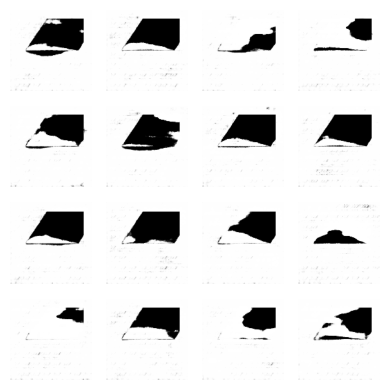

Epoch 23/100
discriminator_loss: 0.4709 | generator_loss: 3.6456


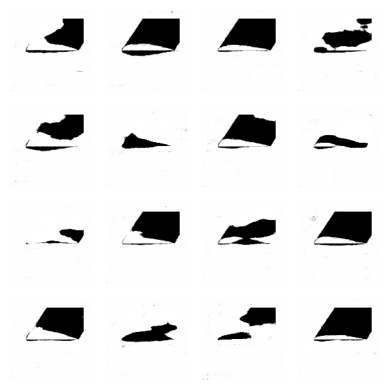

Epoch 24/100
discriminator_loss: 0.3457 | generator_loss: 1.9915


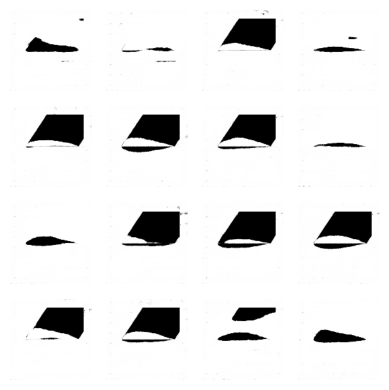

Epoch 25/100
discriminator_loss: 0.4291 | generator_loss: 1.3697


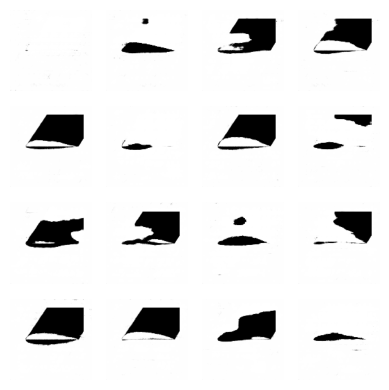

Epoch 26/100
discriminator_loss: 0.3710 | generator_loss: 1.5769


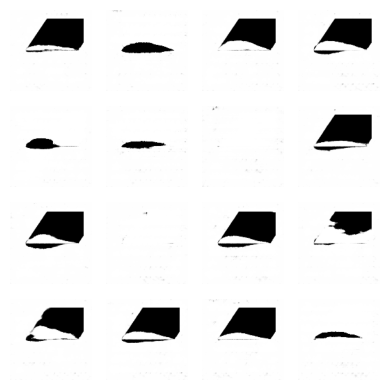

Epoch 27/100
discriminator_loss: 0.4151 | generator_loss: 1.8166


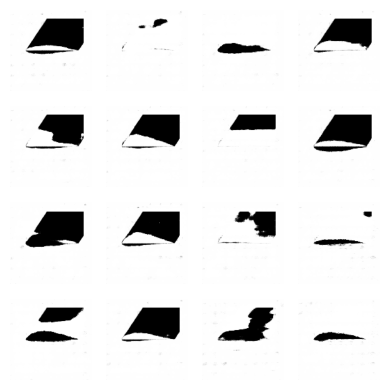

Epoch 28/100
discriminator_loss: 0.7205 | generator_loss: 3.5937


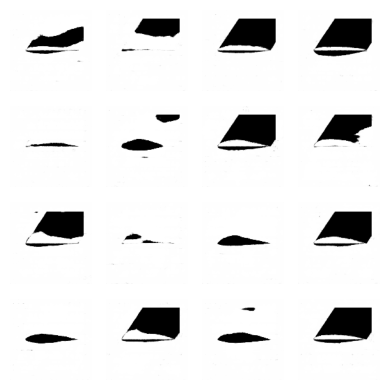

Epoch 29/100
discriminator_loss: 0.4087 | generator_loss: 1.4517


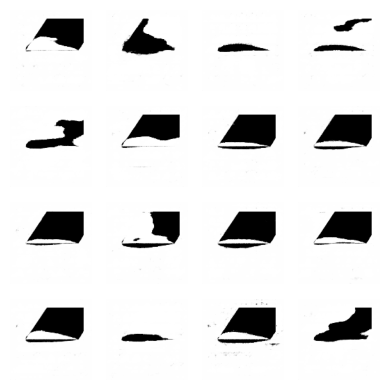

Epoch 30/100
discriminator_loss: 0.3473 | generator_loss: 1.2766


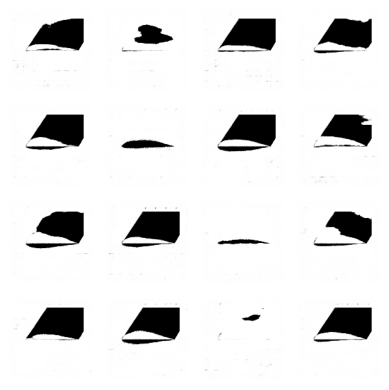

Epoch 31/100
discriminator_loss: 0.6562 | generator_loss: 2.3971


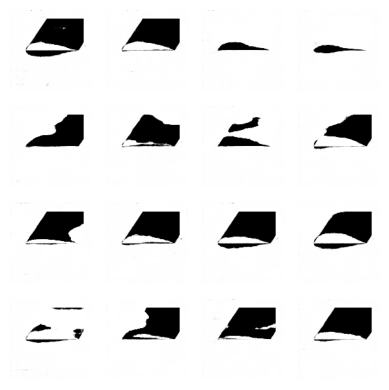

Epoch 32/100
discriminator_loss: 0.4127 | generator_loss: 2.5275


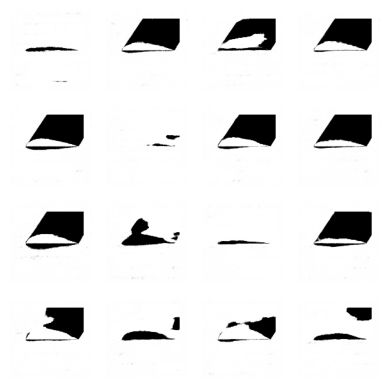

Epoch 33/100
discriminator_loss: 0.3861 | generator_loss: 2.0598


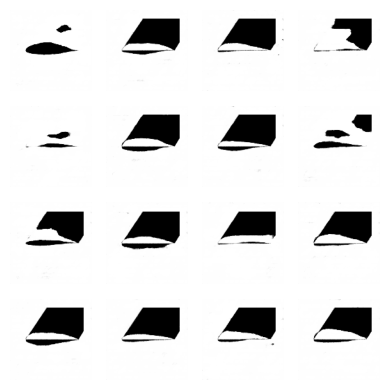

Epoch 34/100
discriminator_loss: 0.3716 | generator_loss: 3.7081


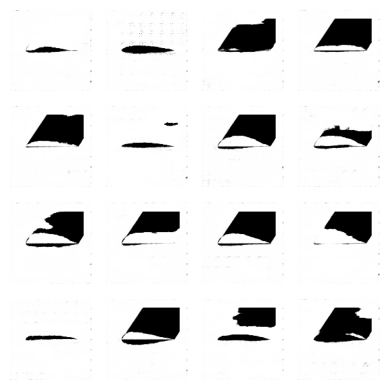

Epoch 35/100
discriminator_loss: 0.3658 | generator_loss: 2.4408


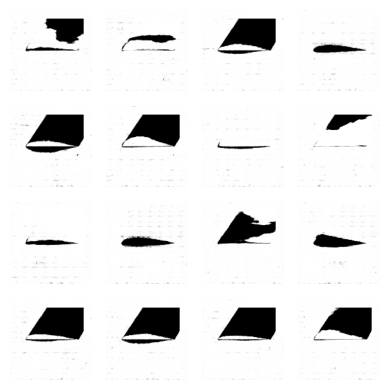

Epoch 36/100
discriminator_loss: 0.4360 | generator_loss: 0.8217


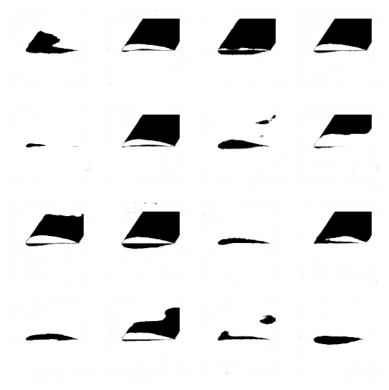

Epoch 37/100
discriminator_loss: 0.3388 | generator_loss: 1.8307


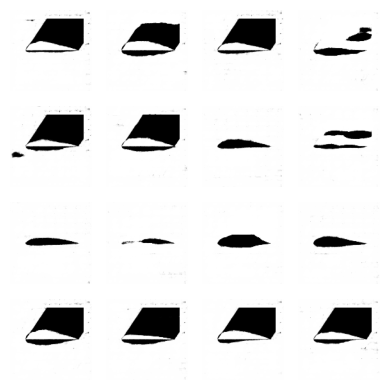

Epoch 38/100
discriminator_loss: 0.3789 | generator_loss: 2.1275


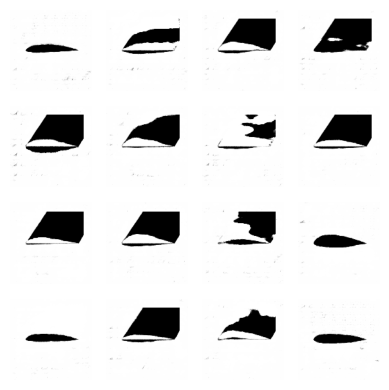

Epoch 39/100
discriminator_loss: 0.3942 | generator_loss: 3.2378


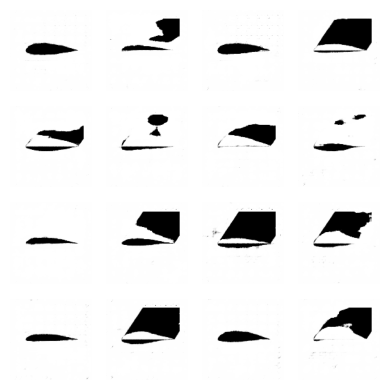

Epoch 40/100
discriminator_loss: 0.4121 | generator_loss: 1.6976


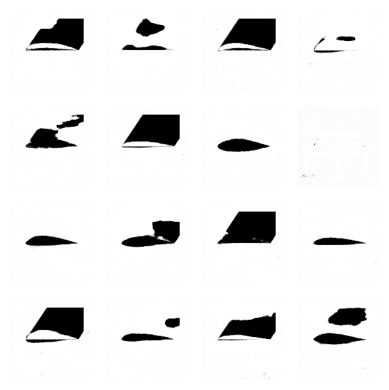

Epoch 41/100
discriminator_loss: 0.3549 | generator_loss: 2.2447


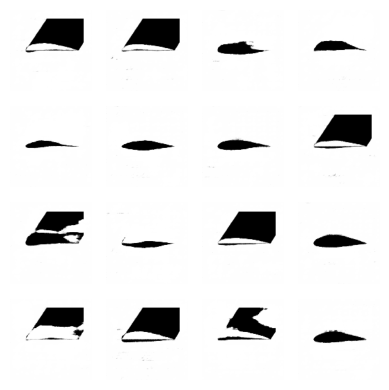

Epoch 42/100
discriminator_loss: 0.4296 | generator_loss: 1.8260


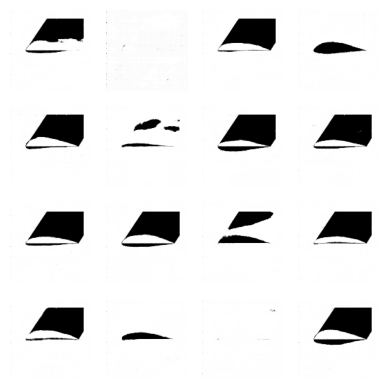

Epoch 43/100
discriminator_loss: 0.3315 | generator_loss: 0.9100


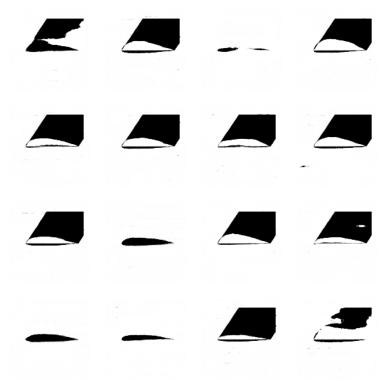

Epoch 44/100
discriminator_loss: 0.4380 | generator_loss: 2.7147


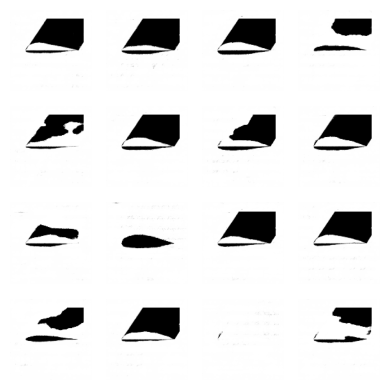

Epoch 45/100
discriminator_loss: 0.3582 | generator_loss: 1.2922


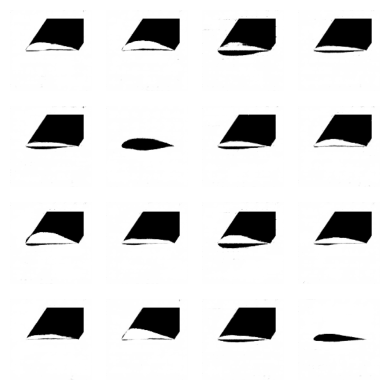

Epoch 46/100
discriminator_loss: 0.3440 | generator_loss: 1.9747


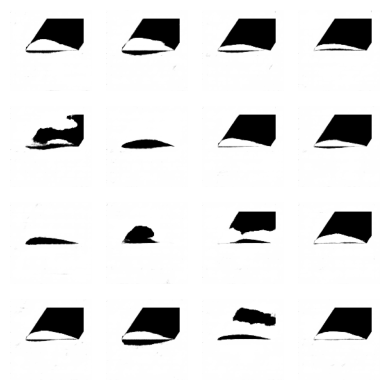

Epoch 47/100
discriminator_loss: 0.3403 | generator_loss: 2.4432


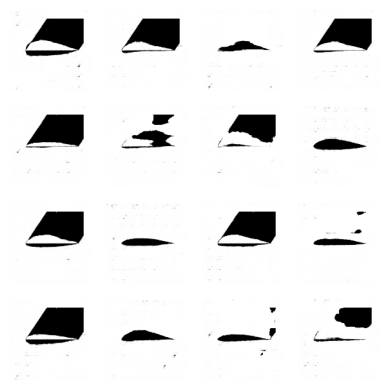

Epoch 48/100
discriminator_loss: 0.4811 | generator_loss: 4.0603


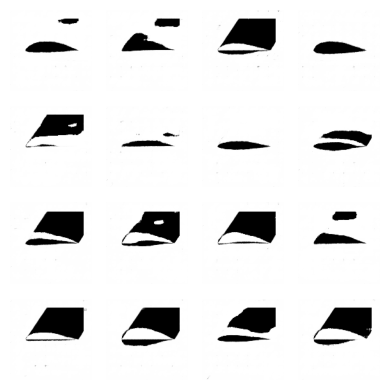

Epoch 49/100
discriminator_loss: 0.3574 | generator_loss: 2.2745


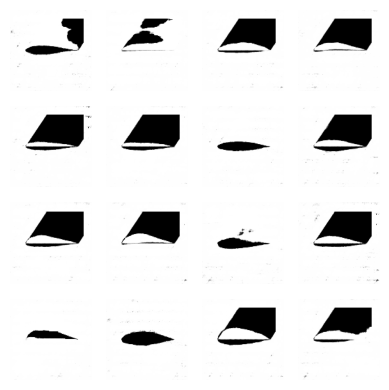

Epoch 50/100
discriminator_loss: 0.3393 | generator_loss: 2.1737


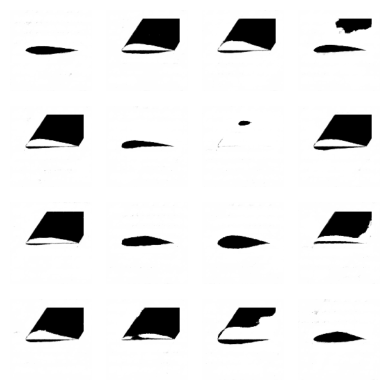

Epoch 51/100
discriminator_loss: 0.3390 | generator_loss: 1.5433


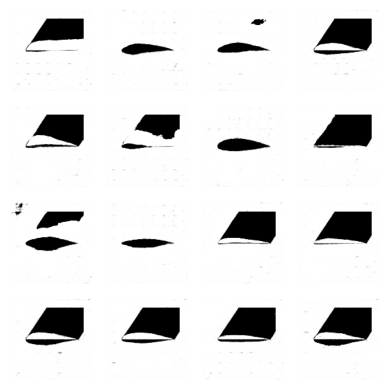

Epoch 52/100
discriminator_loss: 0.3474 | generator_loss: 2.3581


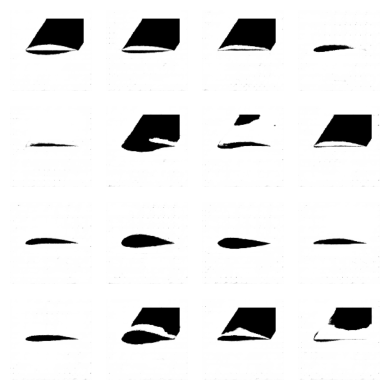

Epoch 53/100
discriminator_loss: 0.3627 | generator_loss: 3.0606


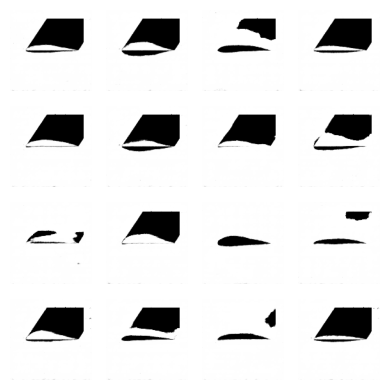

Epoch 54/100
discriminator_loss: 0.4055 | generator_loss: 2.1539


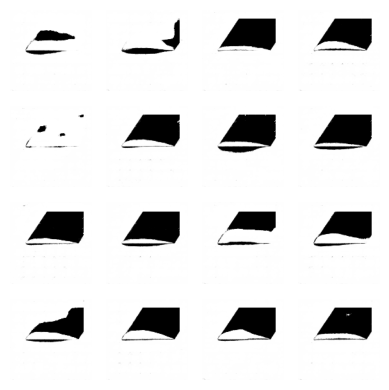

Epoch 55/100
discriminator_loss: 0.4914 | generator_loss: 2.6562


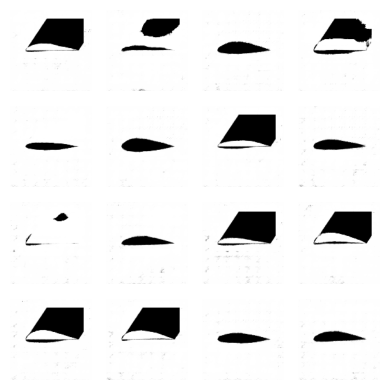

Epoch 56/100
discriminator_loss: 0.4559 | generator_loss: 4.0344


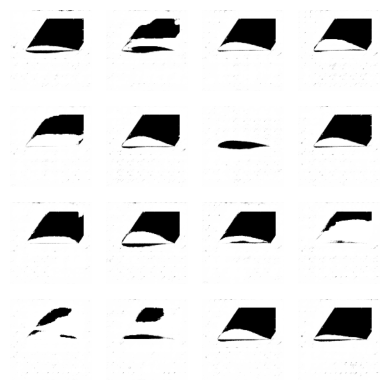

Epoch 57/100
discriminator_loss: 0.3414 | generator_loss: 1.7131


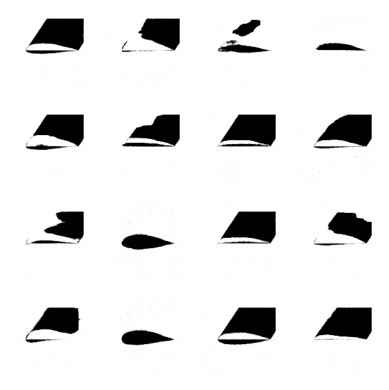

Epoch 58/100
discriminator_loss: 0.4762 | generator_loss: 2.0980


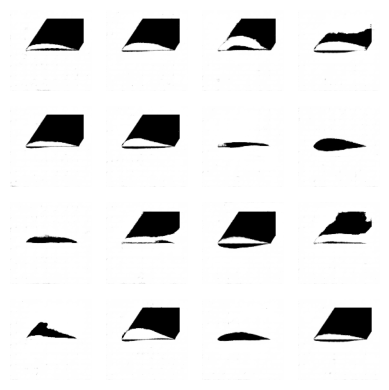

Epoch 59/100
discriminator_loss: 0.3422 | generator_loss: 3.0135


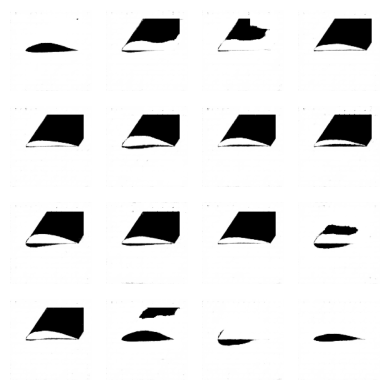

Epoch 60/100
discriminator_loss: 0.3568 | generator_loss: 3.4935


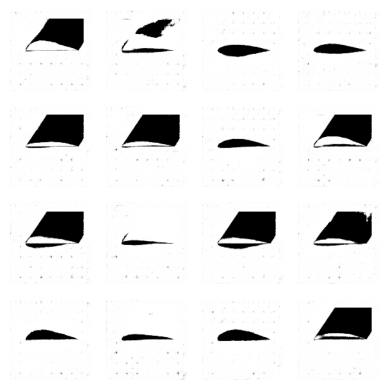

Epoch 61/100
discriminator_loss: 0.4738 | generator_loss: 4.3109


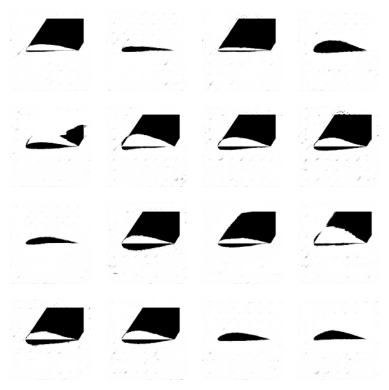

Epoch 62/100
discriminator_loss: 0.4033 | generator_loss: 1.5742


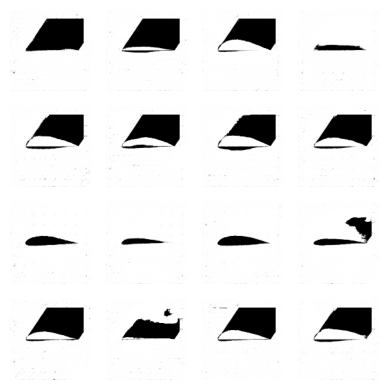

Epoch 63/100
discriminator_loss: 0.3409 | generator_loss: 0.9755


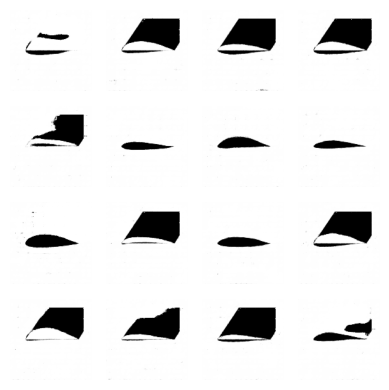

Epoch 64/100
discriminator_loss: 0.4359 | generator_loss: 2.4480


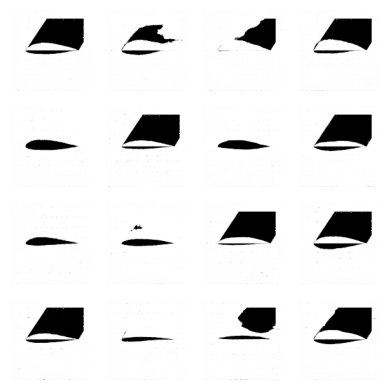

Epoch 65/100
discriminator_loss: 0.3628 | generator_loss: 3.2246


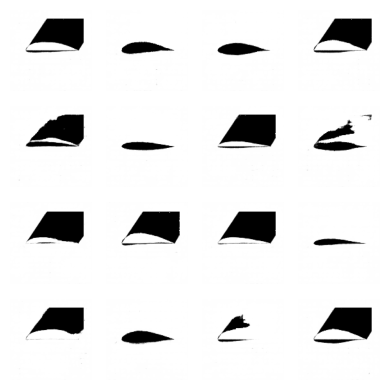

Epoch 66/100
discriminator_loss: 0.5730 | generator_loss: 3.7289


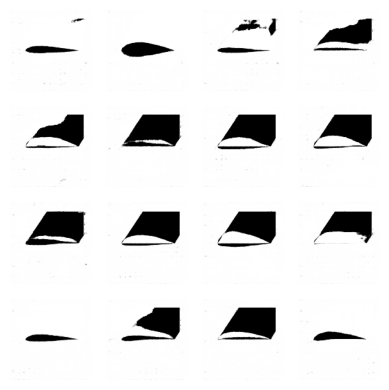

Epoch 67/100
discriminator_loss: 0.3946 | generator_loss: 1.2012


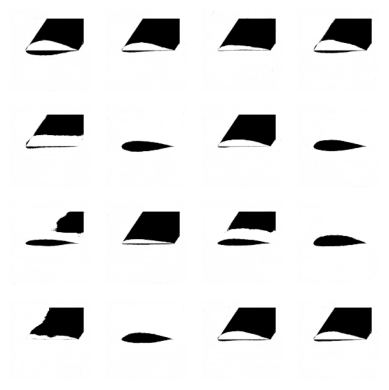

Epoch 68/100
discriminator_loss: 0.3492 | generator_loss: 2.0407


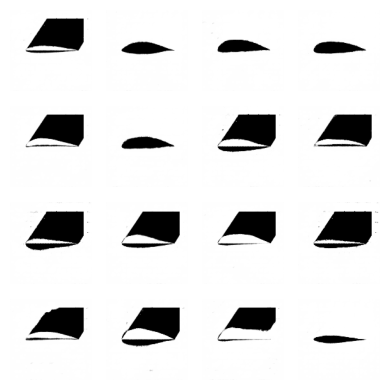

Epoch 69/100
discriminator_loss: 0.3880 | generator_loss: 3.3385


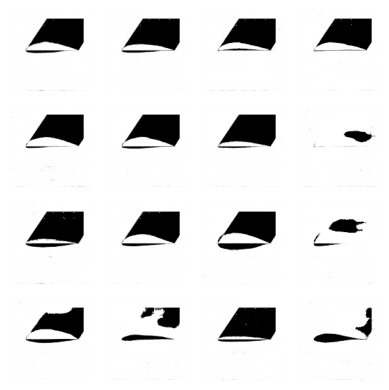

Epoch 70/100
discriminator_loss: 0.4456 | generator_loss: 3.2593


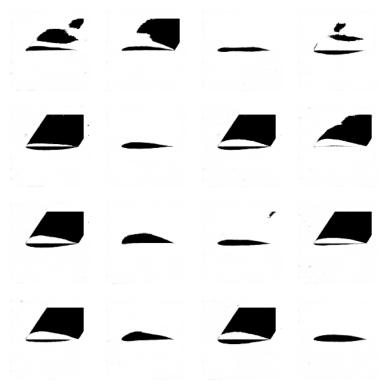

Epoch 71/100
discriminator_loss: 0.3423 | generator_loss: 1.4871


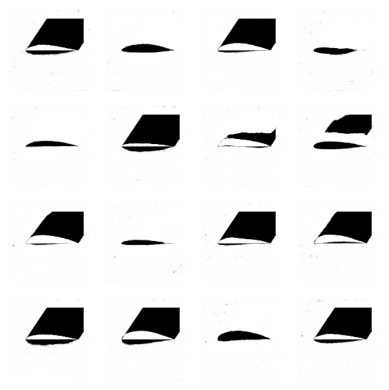

Epoch 72/100
discriminator_loss: 0.4533 | generator_loss: 1.7310


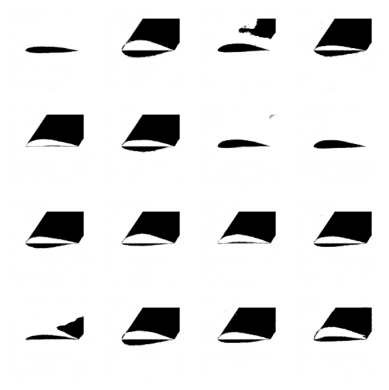

Epoch 73/100
discriminator_loss: 0.5391 | generator_loss: 2.0208


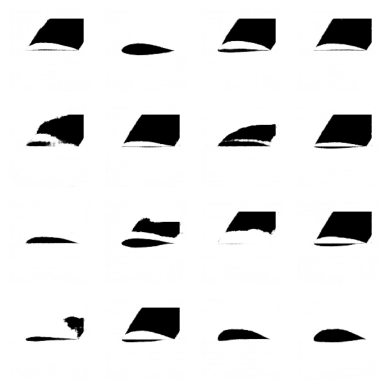

Epoch 74/100
discriminator_loss: 0.4047 | generator_loss: 3.1083


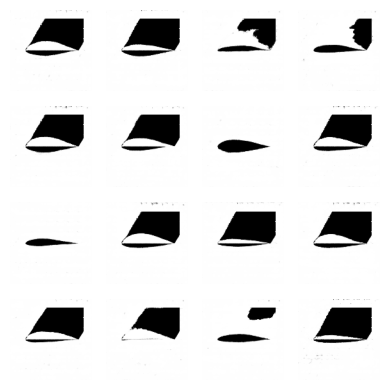

Epoch 75/100
discriminator_loss: 0.4045 | generator_loss: 2.6445


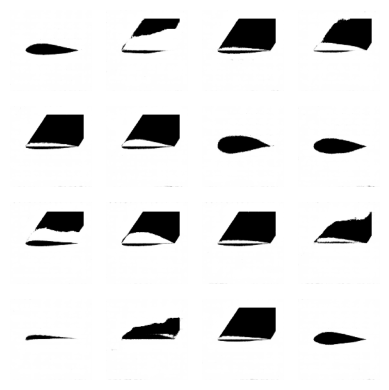

Epoch 76/100
discriminator_loss: 0.3555 | generator_loss: 1.5143


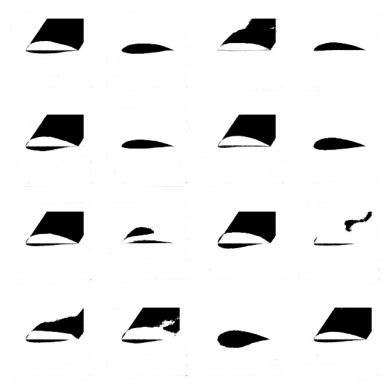

Epoch 77/100
discriminator_loss: 0.3329 | generator_loss: 1.8042


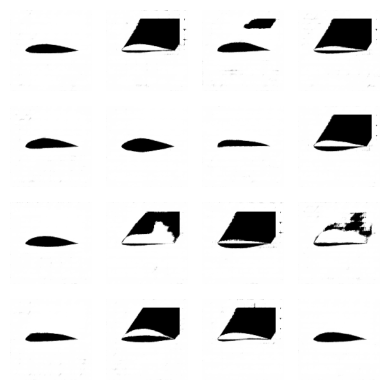

Epoch 78/100
discriminator_loss: 0.3634 | generator_loss: 2.1788


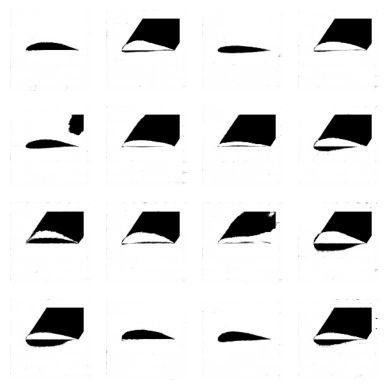

Epoch 79/100
discriminator_loss: 0.3453 | generator_loss: 2.2222


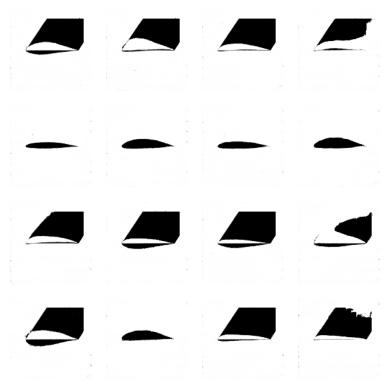

Epoch 80/100
discriminator_loss: 0.3434 | generator_loss: 2.3033


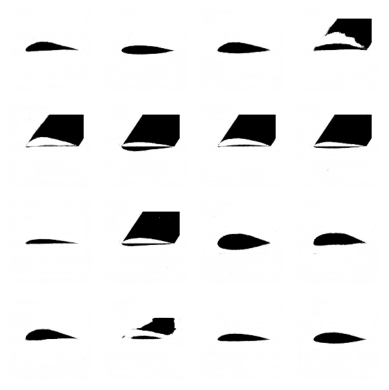

Epoch 81/100
discriminator_loss: 0.5107 | generator_loss: 3.5693


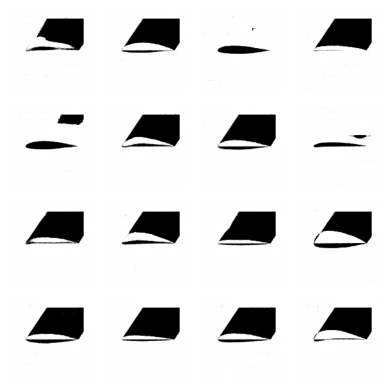

Epoch 82/100
discriminator_loss: 0.4500 | generator_loss: 2.5435


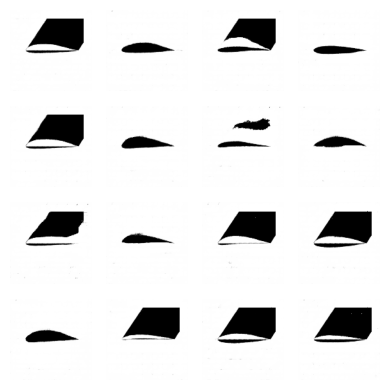

Epoch 83/100
discriminator_loss: 0.3336 | generator_loss: 1.0543


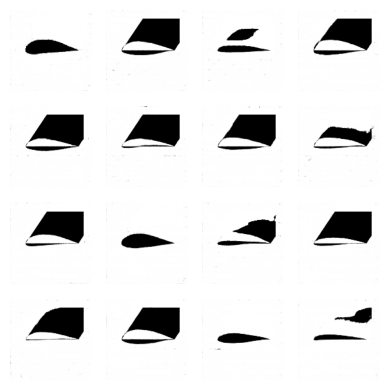

Epoch 84/100
discriminator_loss: 0.3376 | generator_loss: 1.5874


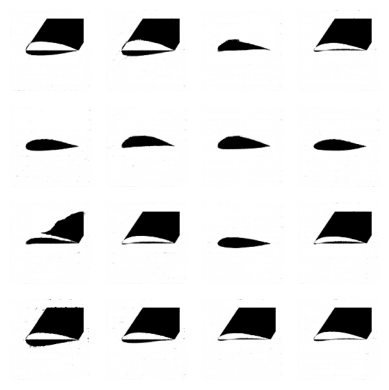

Epoch 85/100
discriminator_loss: 0.3402 | generator_loss: 2.6350


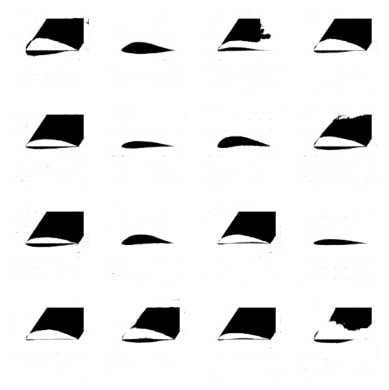

Epoch 86/100
discriminator_loss: 0.3822 | generator_loss: 0.9469


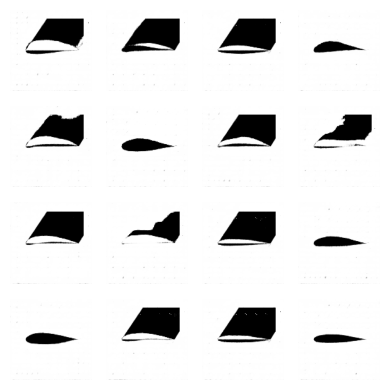

Epoch 87/100
discriminator_loss: 0.3395 | generator_loss: 1.6254


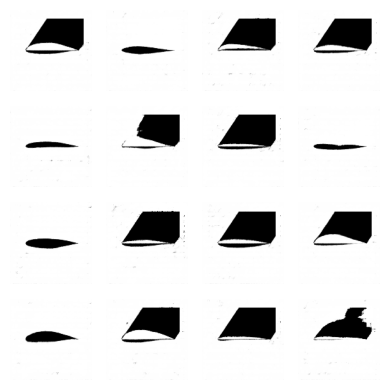

Epoch 88/100
discriminator_loss: 0.3593 | generator_loss: 1.3160


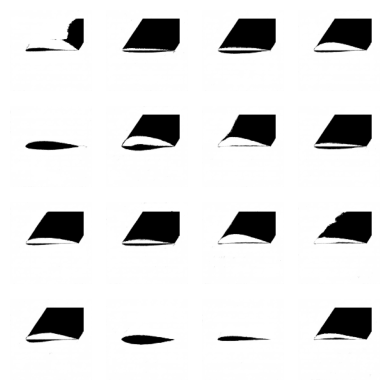

Epoch 89/100
discriminator_loss: 0.3721 | generator_loss: 2.4375


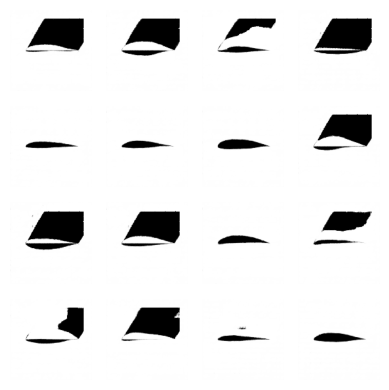

Epoch 90/100
discriminator_loss: 0.3436 | generator_loss: 1.2436


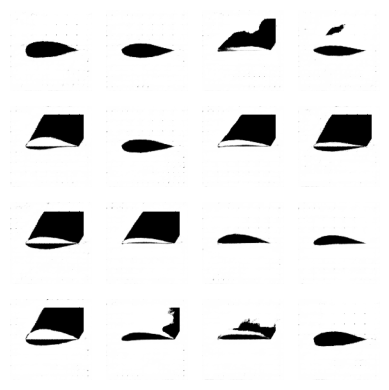

Epoch 91/100
discriminator_loss: 0.3543 | generator_loss: 1.2541


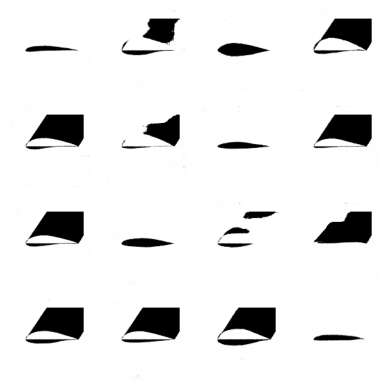

Epoch 92/100
discriminator_loss: 0.3487 | generator_loss: 2.3682


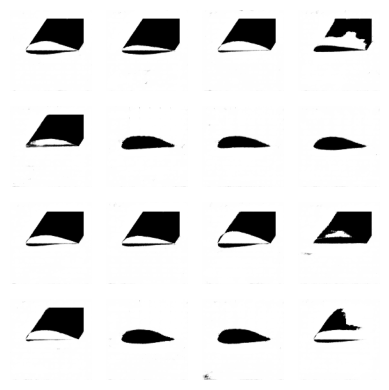

Epoch 93/100
discriminator_loss: 0.4306 | generator_loss: 3.1105


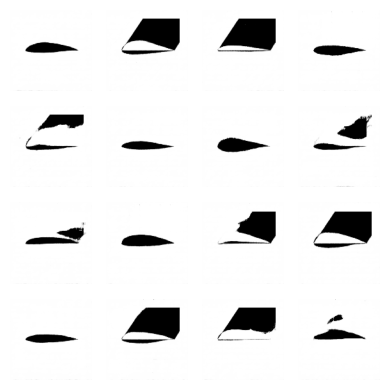

Epoch 94/100
discriminator_loss: 0.3603 | generator_loss: 2.4310


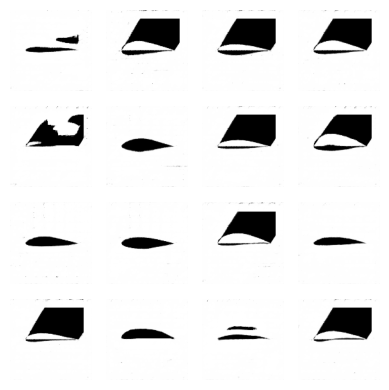

Epoch 95/100
discriminator_loss: 0.3318 | generator_loss: 2.6544


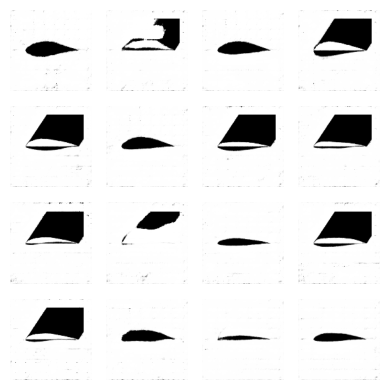

Epoch 96/100
discriminator_loss: 0.3387 | generator_loss: 2.4128


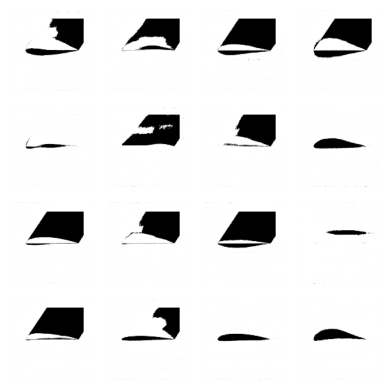

Epoch 97/100
discriminator_loss: 0.3574 | generator_loss: 1.8659


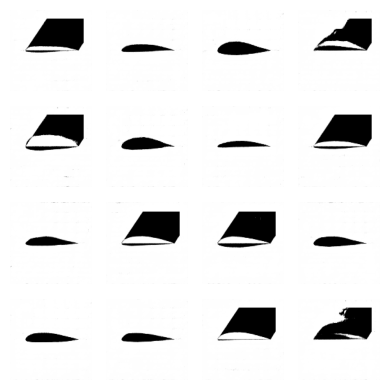

Epoch 98/100
discriminator_loss: 0.3571 | generator_loss: 2.7036


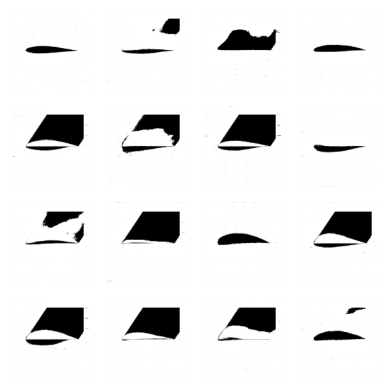

Epoch 99/100
discriminator_loss: 0.4169 | generator_loss: 2.2450


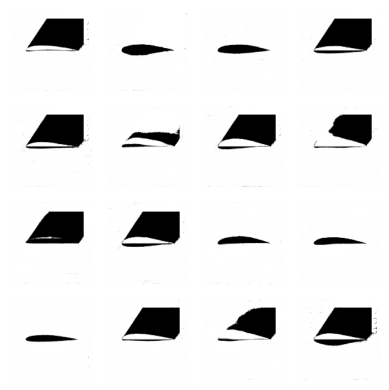

Epoch 100/100
discriminator_loss: 0.3421 | generator_loss: 2.3763


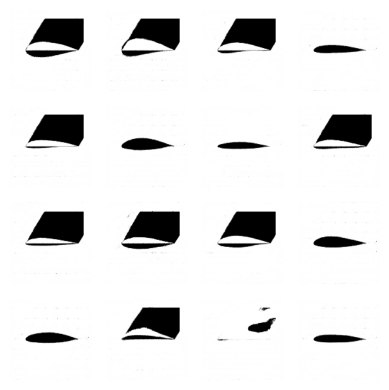

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

# Create a directory to save the generated images in Google Drive
SAVE_DIR = '/content/drive/MyDrive/gan_generated_images'
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

def generate_and_display_images(model, epoch, num_examples=16, noise_dim=100):
    noise = tf.random.normal([num_examples, noise_dim])
    generated_images = model(noise, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(num_examples):
        plt.subplot(4, 4, i+1)
        img = (generated_images[i, :, :, 0] * 127.5 + 127.5).numpy().astype(np.int32)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.savefig(f"{SAVE_DIR}/image_at_epoch_{epoch:04d}_num_{i}.png")  # Save the individual image

    plt.tight_layout()
    plt.savefig(f"{SAVE_DIR}/grid_image_at_epoch_{epoch:04d}.png")  # Save the entire grid
    plt.show()

def train_gan(generator, discriminator, dataset, batch_size, epochs):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        for batch in dataset:
            current_batch_size = batch.shape[0]
            real_labels = 0.9 * tf.ones((current_batch_size, 1))
            fake_labels = 0.1 * tf.ones((current_batch_size, 1))
            noise = tf.random.normal((current_batch_size, 100))

            # Train Discriminator
            with tf.GradientTape() as disc_tape:
                fake_images = generator(noise, training=True)
                real_output = discriminator(batch, training=True)
                fake_output = discriminator(fake_images, training=True)

                real_loss = loss_function(real_labels, real_output)
                fake_loss = loss_function(fake_labels, fake_output)
                discriminator_loss = 0.5 * (real_loss + fake_loss)

                discriminator_gradients = disc_tape.gradient(discriminator_loss, discriminator.trainable_variables)
                discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

            # Train the discriminator again (ratio 2:1)
            with tf.GradientTape() as disc_tape:
                fake_images = generator(noise, training=True)
                fake_output = discriminator(fake_images, training=True)
                fake_loss = loss_function(fake_labels, fake_output)

                discriminator_gradients = disc_tape.gradient(fake_loss, discriminator.trainable_variables)
                discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

            # Train Generator
            noise = tf.random.normal((current_batch_size, 100))
            with tf.GradientTape() as gen_tape:
                generated_images = generator(noise, training=True)
                fake_output = discriminator(generated_images, training=True)
                generator_loss = loss_function(real_labels, fake_output)

                generator_gradients = gen_tape.gradient(generator_loss, generator.trainable_variables)
                generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))

        print(f"discriminator_loss: {discriminator_loss:.4f} | generator_loss: {generator_loss:.4f}")

        # Visual inspection after each epoch
        generate_and_display_images(generator, epoch + 1)

# Call to train the GAN (note the minor typo fix in this line)
train_gan(generator, discriminator, dataset, batch_size=32, epochs=100)


In [ ]:
import os
from tensorflow.keras.models import save_model

# Define the path for the models in your Google Drive
base_path = "/content/drive/MyDrive/gan_models"
generator_path = os.path.join(base_path, "generator_model")
discriminator_path = os.path.join(base_path, "discriminator_model")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Check if the directory exists. If not, create it.
if not os.path.exists(base_path):
    os.makedirs(base_path)

# Save the models
save_model(generator, generator_path)
save_model(discriminator, discriminator_path)

print(f"Generator model saved to: {generator_path}")
print(f"Discriminator model saved to: {discriminator_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Generator model saved to: /content/drive/MyDrive/gan_models/generator_model
Discriminator model saved to: /content/drive/MyDrive/gan_models/discriminator_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model


generator_path = "/content/drive/MyDrive/gan_models/generator_model"
generator = load_model(generator_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 370ms/step


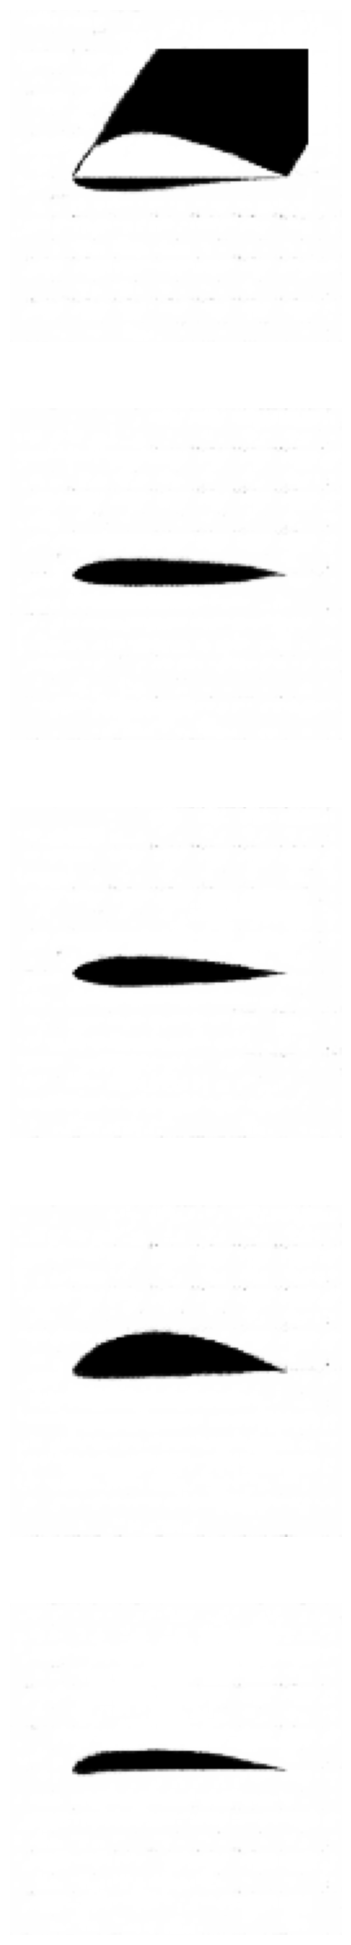

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_aerofoils(generator, num_images):
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)

    # Rescale images to the range [0, 255]
    generated_images = (generated_images + 1) * 127.5

    fig, axs = plt.subplots(num_images, figsize=(5, 5*num_images))

    for i, ax in enumerate(axs):
        ax.imshow(generated_images[i].astype(np.uint8).reshape(128, 128), cmap='gray')
        ax.axis('off')

    plt.show()

# Generate 5 aerofoil images as an example
generate_aerofoils(generator, 5)


In [ ]:
import os
from tensorflow.keras.preprocessing.image import save_img

output_dir = "/content/drive/MyDrive/gan_generated_aerofoils"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

from keras.preprocessing.image import array_to_img

def save_aerofoils(model, n_samples, dest_path="/content/drive/MyDrive/gan_generated_aerofoils"):
    # Generate images
    noise = np.random.normal(0, 1, (n_samples, 100))
    generated_images = model.predict(noise)

    # Rescale images to the range [0, 255]
    generated_images = (generated_images * 127.5) + 127.5

    for i in range(n_samples):
        # If the image is grayscale, expand its dimensions to add a channel dimension
        if generated_images[i].ndim == 2:
            generated_image = np.expand_dims(generated_images[i], axis=-1)
        else:
            generated_image = generated_images[i]

        img = array_to_img(generated_image)
        img.save(os.path.join(dest_path, f"gan_generated_aerofoil_{i}.png"))

# Test the function
save_aerofoils(generator, 5)



1/1 [==============================] - 0s 20ms/step


In [ ]:
import numpy as np
import os
from keras.models import load_model
from keras.preprocessing.image import array_to_img, img_to_array, save_img

# Load the trained generator model
generator_path = '/content/drive/MyDrive/gan_models/generator_model'
generator = load_model(generator_path)

# Function to generate and save aerofoil images
def save_aerofoils(generator, num_images, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

    for i in range(num_images):
        # Generate random noise as an input for the generator
        noise = np.random.normal(0, 1, (1, generator.input_shape[1]))

        # Use the generator to create an aerofoil image
        generated_image = generator.predict(noise)[0]

        # Rescale the image pixel values from [-1, 1] to [0, 255]
        generated_image = (generated_image + 1) * 127.5

        # Convert the image array to an image
        img = array_to_img(generated_image)

        # Save the image
        img_path = os.path.join(directory, f"aerofoil_{i}.png")
        img.save(img_path)

# Generate and save 1000 aerofoil images
output_directory = '/content/drive/MyDrive/gan_generated_aerofoils'
save_aerofoils(generator, 1000, output_directory)


1/1 [==============================] - 0s 18ms/step
